Epoch [100/1000], Loss: 0.1516
Epoch [200/1000], Loss: 0.0890
Epoch [300/1000], Loss: 0.0689
Epoch [400/1000], Loss: 0.0539
Epoch [500/1000], Loss: 0.0426
Epoch [600/1000], Loss: 0.0341
Epoch [700/1000], Loss: 0.0276
Epoch [800/1000], Loss: 0.0228
Epoch [900/1000], Loss: 0.0192
Epoch [1000/1000], Loss: 0.0164


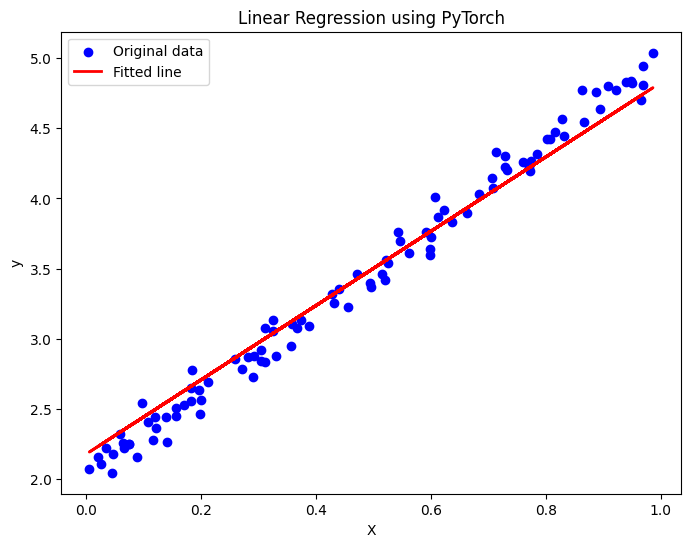

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
np.random.seed(42)
torch.manual_seed(42)

# Generate random data points
X = np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1) * 0.1  # Linear relationship with some noise

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Step 2: Define the Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 3: Train the Model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 4: Evaluate the Model
model.eval()
predicted = model(X_tensor).detach().numpy()

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, predicted, color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using PyTorch')
plt.show()
